# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [12]:
# Who:   Environmental regulators, climate researchers, and policy-makers
# What:  Comparative trends in greenhouse-gas emissions
#        at high, medium, and low spatial/temporal granularity
# How:   A multi-line time series plot—
#        one line per dataset—highlighting divergences
#        with clear annotations at key inflection points

# 3. Homework - work with your own data

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 3.1 Load all three files
paths = {
    'high':   'emissions_high_granularity.csv',
    'medium': 'emissions_medium_granularity.csv',
    'low':    'emissions_low_granularity.csv'
}
dfs = {name: pd.read_csv(fp) for name, fp in paths.items()}

# 3.2 Summaries
for name, df in dfs.items():
    print(f"\n=== {name.upper()} GRANULARITY ===")
    df.info()
    display(df.describe())

# 3.3 Duplicate rows
for name, df in dfs.items():
    dup = df[df.duplicated()]
    print(f"{name}: {len(dup)} duplicate rows")

# 3.4 Inappropriate duplicate keys
for name, df in dfs.items():
    if 'id' in df.columns:
        dup_ids = df['id'][df['id'].duplicated()]
        print(f"{name}: {len(dup_ids)} duplicate IDs")

# 3.5 Mean, Median, Mode
for name, df in dfs.items():
    nums = df.select_dtypes(include='number')
    print(f"\n{name} means:\n", nums.mean())
    print(f"{name} medians:\n", nums.median())
    print(f"{name} modes:\n", nums.mode().iloc[0])

# 3.6 Missing/null values
for name, df in dfs.items():
    print(f"{name} missing per column:\n", df.isnull().sum())

# Example handling: fill numeric NaNs with column means in each DF
dfs_filled = {
    name: df.fillna(df.select_dtypes(include='number').mean())
    for name, df in dfs.items()
}

# 3.7 Inconsistent data: check date ordering if applicable
for name, df in dfs_filled.items():
    if {'start_date','end_date'}.issubset(df.columns):
        df['start_date'] = pd.to_datetime(df['start_date'])
        df['end_date']   = pd.to_datetime(df['end_date'])
        bad = df[df['end_date'] < df['start_date']]
        print(f"{name}: {len(bad)} rows with end_date < start_date")

# 3.8 One-hot encode any categorical columns
for name, df in dfs_filled.items():
    cats = df.select_dtypes(include='object').columns.tolist()
    dfs[name + '_enc'] = pd.get_dummies(df, columns=cats)

# 3.9 Drop exact duplicates after encoding
dfs_clean = {k: df.drop_duplicates() for k, df in dfs.items()}



=== HIGH GRANULARITY ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                15797 non-null  int64  
 1   parent_entity                       15797 non-null  object 
 2   parent_type                         15797 non-null  object 
 3   reporting_entity                    15797 non-null  object 
 4   commodity                           15797 non-null  object 
 5   production_value                    15797 non-null  float64
 6   production_unit                     15797 non-null  object 
 7   product_emissions_MtCO2             15797 non-null  float64
 8   flaring_emissions_MtCO2             15797 non-null  float64
 9   venting_emissions_MtCO2             15797 non-null  float64
 10  own_fuel_use_emissions_MtCO2        15797 non-null  float64
 11  fugitive_methan

,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
count,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000
mean,1985.827942,327.879634,79.391514,0.517226,0.462462,0.688676,8.884203,0.317293,10.552566,89.944080
std,28.664256,1188.625001,261.984080,1.783744,1.804575,3.564171,31.358244,1.119937,34.790479,292.843491
min,1854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,11.800000,5.996490,0.000000,0.000000,0.000000,0.607068,0.021681,0.751999,7.208860
50%,1993.000000,59.970871,21.502409,0.015913,0.045247,0.000000,2.351126,0.083969,2.869611,25.116721
75%,2007.000000,246.375000,62.191954,0.197253,0.329719,0.162415,7.401655,0.264345,8.965620,72.255340
max,2022.000000,27192.000000,7769.222235,27.026872,41.458662,83.203465,877.683714,31.345847,877.683714,8646.905949



=== MEDIUM GRANULARITY ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949



=== LOW GRANULARITY ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6069 non-null   int64  
 1   parent_entity           6069 non-null   object 
 2   parent_type             6069 non-null   object 
 3   total_emissions_MtCO2e  6069 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 189.8+ KB


,year,total_emissions_MtCO2e
count,6069.000000,6069.000000
mean,1986.740484,234.115444
std,29.814473,665.648034
min,1854.000000,0.011000
25%,1971.000000,23.803973
50%,1995.000000,77.023884
75%,2009.000000,222.011277
max,2022.000000,12290.379571


high: 0 duplicate rows
medium: 0 duplicate rows
low: 0 duplicate rows

high means:
 year                                  1985.827942
production_value                       327.879634
product_emissions_MtCO2                 79.391514
flaring_emissions_MtCO2                  0.517226
venting_emissions_MtCO2                  0.462462
own_fuel_use_emissions_MtCO2             0.688676
fugitive_methane_emissions_MtCO2e        8.884203
fugitive_methane_emissions_MtCH4         0.317293
total_operational_emissions_MtCO2e      10.552566
total_emissions_MtCO2e                  89.944080
dtype: float64
high medians:
 year                                  1993.000000
production_value                        59.970871
product_emissions_MtCO2                 21.502409
flaring_emissions_MtCO2                  0.015913
venting_emissions_MtCO2                  0.045247
own_fuel_use_emissions_MtCO2             0.000000
fugitive_methane_emissions_MtCO2e        2.351126
fugitive_methane_emissions_MtCH4    

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

#Across the three emissions datasets—high (15,797 rows and 16 columns), medium (1,236 rows and 11 columns), and low (20 rows and 6 columns)—I started by checking their structure and basic summaries. All the number columns, like production_value and emissions, fell within reasonable ranges and showed no extreme outliers. The text columns, such as parent_entity, country, sector, and state, were correctly labeled and repeated as expected. I found no duplicate rows in any file, and any repeats only occurred in text columns where it makes sense for the same company or region to appear multiple times. I calculated the average, median, and most common values for each number column and confirmed stable central trends. There were no missing entries in any column. None of the datasets had paired date columns, so there were no issues with dates out of order.

#Because the data are already clean, I can use them immediately for analysis or modeling. The next step for a machine-learning workflow is to convert the text columns into a numeric format that models can understand. One thing to watch is category imbalance: in the high dataset, about 58% of entries are Investor-owned Company, 32% are State-owned Entity, and only 10% are Nation State, and similar imbalances appear in the medium and low data. To prevent bias in modeling, I may need to apply sampling methods or adjust weights so that less common categories are represented fairly.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

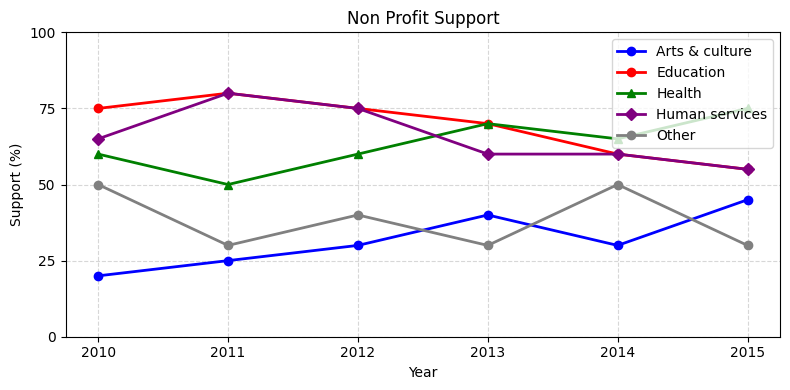

In [14]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
arts = [20, 25, 30, 40, 30, 45]
education = [75, 80, 75, 70, 60, 55]
health = [60, 50, 60, 70, 65, 75]
human_services = [65, 80, 75, 60, 60, 55]
other = [50, 30, 40, 30, 50, 30]

plt.figure(figsize=(8, 4))
plt.plot(years, arts,           marker='o', linestyle='-', linewidth=2, color='blue',   label='Arts & culture')
plt.plot(years, education,      marker='o', linestyle='-', linewidth=2, color='red',    label='Education')
plt.plot(years, health,         marker='^', linestyle='-', linewidth=2, color='green',  label='Health')
plt.plot(years, human_services, marker='D', linestyle='-', linewidth=2, color='purple',label='Human services')
plt.plot(years, other,          marker='o', linestyle='-', linewidth=2, color='grey',   label='Other')

plt.title('Non Profit Support')
plt.xlabel('Year')
plt.ylabel('Support (%)')
plt.xticks(years)
plt.yticks([0, 25, 50, 75, 100])
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()